Data cleaning

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Heart Disease data.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
dup=df.duplicated().any()

In [9]:
print(dup)

True


In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(302, 14)

In [12]:
#df['sex']=df['sex'].apply(lambda x:'Female' if x==0 else x)
#df['sex']=df['sex'].apply(lambda x:'Male' if x==1 else x)

df['cp']=df['cp'].apply(lambda x:"Typical Angine" if x == 0 else x)
df['cp']=df['cp'].apply(lambda x: "Atypical Angina" if x ==1 else x)
df['cp']=df['cp'].apply(lambda x:"Non-Anginal pain" if x == 2 else x)
df['cp']=df['cp'].apply(lambda x:"Asymptomatic" if x == 3 else x)

df['fbs']=df['fbs'].apply(lambda x:'True' if x==1 else x)
df['fbs']=df['fbs'].apply(lambda x:'False' if x==0 else x)

df['restecg']=df['restecg'].apply(lambda x:"Normal" if x == 0 else x)
df['restecg']=df['restecg'].apply(lambda x: "Abnormality" if x ==1 else x)
df['restecg']=df['restecg'].apply(lambda x:"Hypertrophy" if x == 2 else x)

df['exang']=df['exang'].apply(lambda x:'Yes' if x==1 else x)
df['exang']=df['exang'].apply(lambda x:'No' if x==0 else x)

df['thal'].value_counts()

df['thal']=df['thal'].apply(lambda x:'Normal' if x==2 else x)
df['thal']=df['thal'].apply(lambda x:'Null Value' if x==0 else x)
df['thal']=df['thal'].apply(lambda x:'Fixed Defect' if x==1 else x)
df['thal']=df['thal'].apply(lambda x:'Reversable Defect' if x==3 else x)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

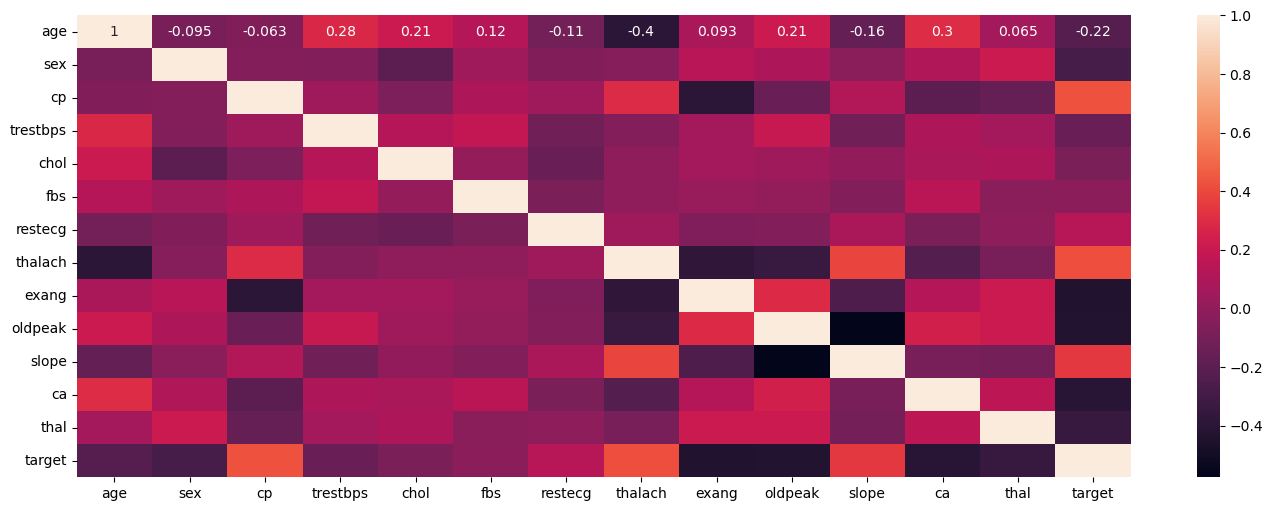

In [16]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

In [17]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

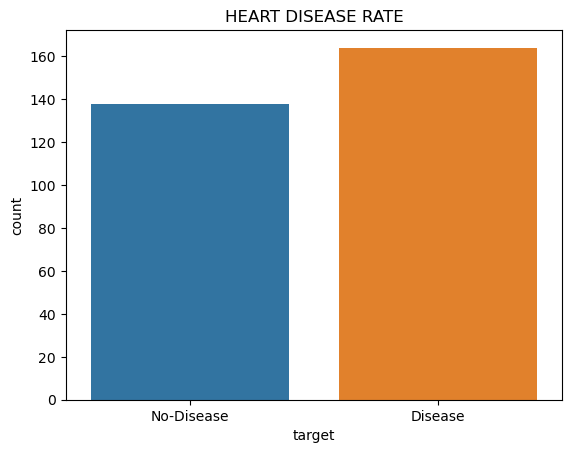

In [19]:
sns.countplot(x=df['target'],data=df)
plt.xticks([0,1],['No-Disease','Disease'])
plt.title('HEART DISEASE RATE')
plt.show()

In [20]:
df['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [37]:
heart_disease_rates = df.groupby('sex')['target'].mean()

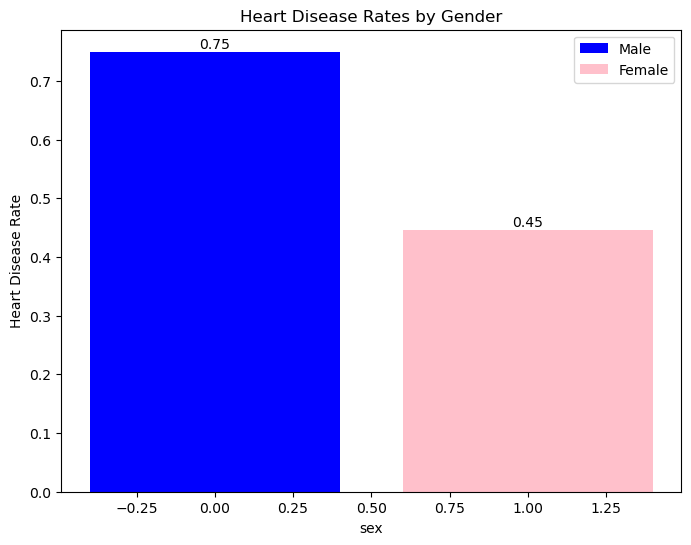

In [38]:
plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(heart_disease_rates.index, heart_disease_rates.values, color=['blue', 'pink'])
plt.title('Heart Disease Rates by Gender')
plt.xlabel('sex')
plt.ylabel('Heart Disease Rate')
plt.legend(bars, ['Male', 'Female'], loc='upper right')
for bar, rate in zip(bars, heart_disease_rates.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()


<Axes: xlabel='age', ylabel='Density'>

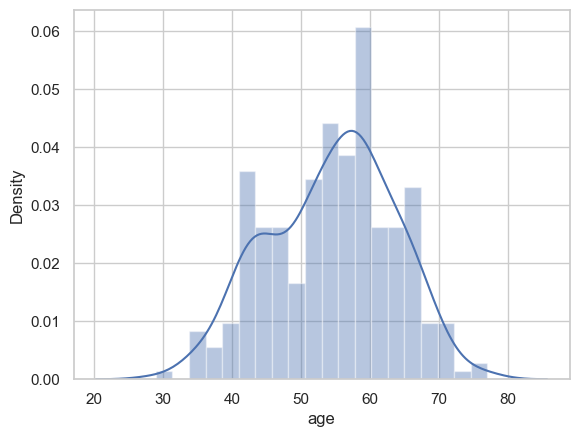

In [23]:
sns.distplot(df['age'],bins=20)

([<matplotlib.axis.XTick at 0x17a307c85d0>,
 [Text(0, 0, 'Typical angine'),
  Text(1, 0, 'Atypical angine'),
  Text(2, 0, 'Non-anginal pain'),
  Text(3, 0, 'Asymptomatic')])

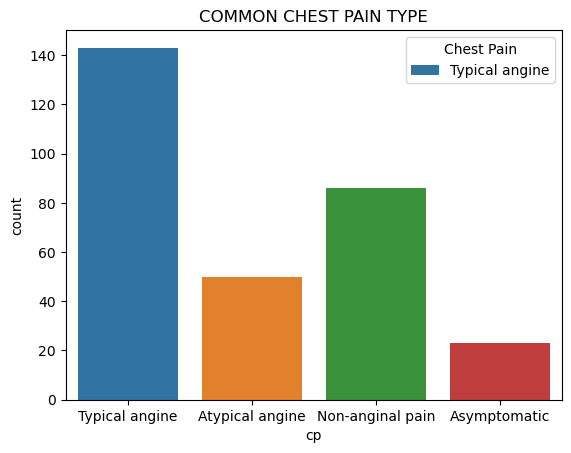

In [48]:
sns.countplot(x=df['cp'])
plt.title('COMMON CHEST PAIN TYPE')
plt.legend(title='Chest Pain', labels=['Typical angine','Atypical angine','Non-anginal pain','Asymptomatic'])
plt.xticks([0,1,2,3],['Typical angine','Atypical angine','Non-anginal pain','Asymptomatic'])

<Axes: >

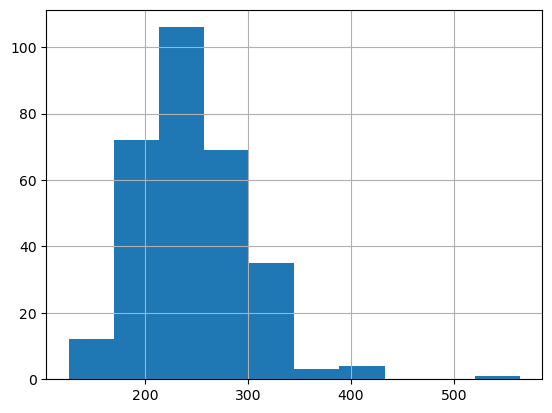

In [49]:
df['chol'].hist()

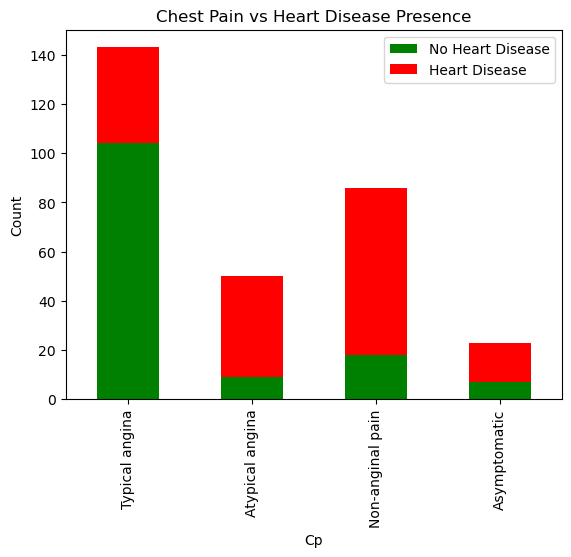

In [54]:
# Count occurrences of each combination of chest pain and target
ct_counts = df.groupby(['cp', 'target']).size().unstack(fill_value=0)

# Plotting the data
ct_counts.plot(kind='bar', stacked=True, color=['green', 'red'])

# Adding labels and title

plt.xticks([0, 1, 2, 3], ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(title='Target', labels=['No Disease', 'Disease'])

plt.title('Chest Pain vs Heart Disease Presence')
plt.xlabel('Cp')
#("Chest Pain(0='Typical angina', 1='Atypical angina', 2='Non-anginal pain',3= 'Asymptomatic')")
plt.ylabel('Count')

# Adding legend
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper right')

plt.show()

In [55]:
df.to_csv("Heart Disease data Final.csv",index = False)